In [99]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import csv
import time
import itertools
import seaborn as sns

import nltk
import nltk.corpus # sample text for performing tokenization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from gensim.models import Word2Vec
from gensim.parsing.porter import PorterStemmer
from gensim.utils import simple_preprocess

# Train the random forest and optimize it
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
# Importing twitter dataset

twitter_df = pd.read_csv('data/twitter_all_data.csv',index_col=False)

#Fill missing values
twitter_df['ed_label_0'] = twitter_df['ed_label_0'].fillna(-99)
twitter_df['ed_label_1'] = twitter_df['ed_label_1'].fillna(-99)
twitter_df = twitter_df.fillna("")

twitter_df['oh_label'] = twitter_df['oh_label'].astype(str)
twitter_df = twitter_df.iloc[:,4:12]
twitter_df.head()

,text,annotation,oh_label,cat_enc,ed_label_0,ed_label_1,hashtags,tokenized
0,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,1,-99.0,-99.0,[],wrong isi follows example mohammed quran exactly
1,@SirajZarook @OdiniaInvictus @BilalIGhumman @I...,racism,1.0,1,-99.0,-99.0,[],good muslim good despite bad religion
2,"@scamp_faridxx @AbuAlbaraaSham Yeah, it's call...",racism,1.0,1,-99.0,-99.0,[],yeah called caring human life idiot something ...
3,@Asadumarfans You are a Muslim. You are brain ...,racism,1.0,1,-99.0,-99.0,[],muslim brain dead repeat others said million time
4,@harmlesstree2 @MaxBlumenthal If you want to u...,racism,1.0,1,-99.0,-99.0,[],want understand lie muslim living peace jew re...


In [101]:
twitter_df[twitter_df['oh_label']=='']

,text,annotation,oh_label,cat_enc,ed_label_0,ed_label_1,hashtags,tokenized


In [102]:
twitter_df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in twitter_df['tokenized']] 

porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
twitter_df['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in twitter_df['tokenized_text'] ]
twitter_df['stemmed_tokens'].head(10)

0    [wrong, isi, follow, exampl, moham, quran, exa...
1          [good, muslim, good, despit, bad, religion]
2    [yeah, call, care, human, life, idiot, someth,...
3    [muslim, brain, dead, repeat, other, said, mil...
4    [want, understand, lie, muslim, live, peac, je...
5    [total, liar, like, pedophil, prophet, un, sol...
6    [daesh, shia, militia, driven, religion, hatr,...
7    [muslim, world, ever, produc, anyth, tyrant, d...
8    [islam, answer, anyth, pretend, answer, illog,...
9    [attack, everyon, follow, religi, cult, hate, ...
Name: stemmed_tokens, dtype: object

In [103]:
# Train and test set
X_train, X_test, y_train, y_test = train_test_split(twitter_df[['stemmed_tokens']], twitter_df['oh_label'], stratify=twitter_df['oh_label'], random_state=42)
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.to_frame()
y_train = y_train.reset_index()
y_test = y_test.to_frame()
y_test = y_test.reset_index()

In [104]:
# Save for later
y_train.to_csv("data/y_train.csv")
y_test.to_csv("data/y_test.csv")

In [75]:
X_train

,index,stemmed_tokens
0,90486,"[hi, wifion, thank, much, patient, address, co..."
1,94218,"[serious, believ, episod, air, cancel, show, p..."
2,174977,"[good, point, expect, see, articl, delet, both..."
3,139172,"[read, background, page, user, wikipedia, make..."
4,171726,"[fair, us, rational, imag, ober, headjpg, than..."
...,...,...
183083,51227,"[categori, thank, fix, categori, articl, made,..."
183084,191364,"[squad, number, like, said, coupl, hour, ago, ..."
183085,155494,"[oh, lower, case, alreadi, fix]"
183086,147864,"[ag, stretch, articl, run, room, ned, page, st..."


In [76]:
# Load the model from the model file
word2vec_model_file = "model/twitter_all_data.csv" + 'word2vec_' + '.model'

cy_w2v_model = Word2Vec.load(word2vec_model_file)

In [77]:
print(len(cy_w2v_model.wv.key_to_index))


149365


In [78]:
#X_train['stemmed_tokens']
cy_w2v_model.wv['yeah']

array([-0.19103162,  0.3054026 ,  0.6317532 , -0.3712743 , -0.1935963 ,
       -0.21639083, -0.31951857,  1.0095747 ,  0.09426787,  0.245261  ,
        0.00230742, -0.15723123, -0.03469273,  0.30538696, -0.08957472,
       -0.05388337,  0.1618818 ,  0.03225785,  0.39213526, -0.07716069,
        1.066499  ,  0.5153368 ,  0.7757925 , -0.49315995, -0.32910055,
       -0.14942853, -0.14316288, -0.17037706, -0.34862855, -0.09400629,
        0.8418618 ,  0.1607813 ,  0.20108333,  0.05248326,  0.33797196,
       -0.26492772,  0.50001645,  0.08412524,  0.3204727 , -0.3256478 ,
        0.1447871 , -0.3376813 ,  0.22053783,  0.2680751 ,  0.15228692,
       -0.19798425, -0.2705868 ,  0.20873782,  0.09026598, -0.08993151,
        0.6867874 , -0.14970498, -0.8010627 , -0.09549747,  0.33067355,
        0.26538315,  0.06159803, -0.52716756, -0.4233821 , -0.5927203 ,
       -0.39680755, -0.33903894, -0.44433218,  0.36633745, -0.21591258,
       -0.02884297, -0.42726296,  0.20371346,  0.39365438,  0.18

In [79]:
# Store the vectors for train data in following file
word2vec_trainfile = "data/" + 'train_w2v.csv'
with open(word2vec_trainfile, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([cy_w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(100)) 
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')
        

/Users/dominika-schreyer-macbook-pro/git/frauenloop/fl_venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dominika-schreyer-macbook-pro/git/frauenloop/fl_venv/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [80]:
# Store the vectors for test data in following file
word2vec_testfile = "data/" + 'test_w2v.csv'
with open(word2vec_testfile, 'w+') as word2vec_file:
    for index, row in X_test.iterrows():
        model_vector = (np.mean([cy_w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(100)) 
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [105]:
missing_values = ["n/a", "na", "--", "NaN"]

# Load from the filename
X_train = pd.read_csv(word2vec_trainfile, na_values = missing_values)
X_train = X_train.fillna(0)

X_test = pd.read_csv(word2vec_testfile, na_values = missing_values)
X_test = X_test.fillna(0)

X_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.066083,0.228192,0.265611,-0.423288,-0.156784,-0.423585,0.049375,0.673195,0.260885,0.152471,...,0.075249,0.082945,-0.467649,-0.122007,0.016594,0.296226,0.561882,-0.234450,0.208313,-0.297632
1,0.007052,0.090906,0.235581,-0.197197,-0.227062,-0.246563,0.036345,0.600414,0.264716,0.289075,...,0.023533,0.443215,-0.440517,-0.140379,-0.099580,0.312064,0.567527,-0.056296,0.256267,-0.200287
2,-0.220284,0.225951,0.825337,-0.471404,-0.327302,-0.324946,0.024609,0.384684,-0.421309,0.204980,...,0.413566,0.394929,-0.372696,-0.171054,-0.146892,0.109466,-0.165783,0.172565,0.214474,-0.436571
3,0.021553,0.209460,0.259755,-0.402213,-0.358868,-0.324892,-0.003527,0.553930,0.308125,0.216832,...,0.000879,0.126649,-0.239489,-0.117324,-0.052860,0.206109,0.507735,-0.091568,0.144753,-0.118630
4,-0.088877,0.239102,0.099719,-0.505024,-0.294007,-0.234694,-0.067490,0.628590,0.294292,0.215150,...,-0.032801,0.200441,-0.143910,-0.197384,-0.129881,0.301153,0.500059,-0.080257,0.106218,-0.097873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61025,-0.228120,0.089006,0.230128,-0.413202,-0.322376,-0.413815,-0.040281,0.465050,0.422706,0.561924,...,0.096316,0.213734,-0.229980,-0.198290,0.164703,0.231440,0.505971,0.078790,0.112987,-0.036876
61026,-0.260704,0.323874,-0.029374,-0.229461,-0.265986,-0.284805,0.005903,0.460972,0.205614,0.191813,...,0.094657,0.327529,-0.368572,-0.043088,0.083776,0.390849,0.515083,-0.153843,0.413827,-0.189960
61027,-0.026152,0.130518,0.173985,-0.461386,-0.400222,-0.207964,-0.012864,0.381916,0.325007,0.321725,...,-0.048446,0.248627,-0.366047,-0.134030,-0.249024,0.377254,0.479020,-0.140778,0.081110,-0.203531
61028,-0.143398,0.188149,0.250333,-0.034816,0.018637,-0.298945,0.136515,0.360407,0.148407,0.093361,...,0.107658,0.203708,0.023461,0.068664,-0.101470,0.251280,0.149749,-0.308410,0.075889,0.097020


In [106]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61030 entries, 0 to 61029
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       61030 non-null  float64
 1   1       61030 non-null  float64
 2   2       61030 non-null  float64
 3   3       61030 non-null  float64
 4   4       61030 non-null  float64
 5   5       61030 non-null  float64
 6   6       61030 non-null  float64
 7   7       61030 non-null  float64
 8   8       61030 non-null  float64
 9   9       61030 non-null  float64
 10  10      61030 non-null  float64
 11  11      61030 non-null  float64
 12  12      61030 non-null  float64
 13  13      61030 non-null  float64
 14  14      61030 non-null  float64
 15  15      61030 non-null  float64
 16  16      61030 non-null  float64
 17  17      61030 non-null  float64
 18  18      61030 non-null  float64
 19  19      61030 non-null  float64
 20  20      61030 non-null  float64
 21  21      61030 non-null  float64
 2

In [107]:
y_train[y_train['oh_label']=='']
y_test[y_test['oh_label']=='']
y_train[y_train['oh_label'].isna()]
y_test[y_test['oh_label'].isna()]

,index,oh_label


In [108]:
y_test['oh_label'].info()
y_test['oh_label'] = pd.to_numeric(y_test["oh_label"])
y_train['oh_label'] = pd.to_numeric(y_train["oh_label"])

<class 'pandas.core.series.Series'>
RangeIndex: 61030 entries, 0 to 61029
Series name: oh_label
Non-Null Count  Dtype 
--------------  ----- 
61030 non-null  object
dtypes: object(1)
memory usage: 476.9+ KB


In [85]:
start_time = time.time()

rf = RandomForestClassifier(
         n_jobs=-1,
         oob_score=True,
         random_state = 0)

params = dict(n_estimators=randint(10,200),
                     max_depth=randint(1,6),
                     min_samples_split=randint(1,30),
                     min_samples_leaf=randint(1,30),
                     class_weight=['balanced', 'balanced_subsample',None])
rf_word2vec = RandomizedSearchCV(rf, params, random_state=0, scoring='f1',n_iter=10, verbose=1, return_train_score=True)
rf_word2vec.fit(X_train, y_train['oh_label']) # refit with the best parameters
print(rf_word2vec.best_params_)
print("Time taken to train random forest: " + str(time.time() - start_time))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 185}
Time taken to train random forest: 410.45562171936035


In [109]:
train_predictions_w2v = rf_word2vec.predict(X_train)
print(classification_report(y_train['oh_label'],train_predictions_w2v))

test_predictions_w2v = rf_word2vec.predict(X_test)
print(classification_report(y_test['oh_label'],test_predictions_w2v))

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91    146309
         1.0       0.61      0.83      0.70     36779

    accuracy                           0.86    183088
   macro avg       0.78      0.85      0.80    183088
weighted avg       0.88      0.86      0.87    183088

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     48770
         1.0       0.60      0.82      0.69     12260

    accuracy                           0.85     61030
   macro avg       0.77      0.84      0.80     61030
weighted avg       0.88      0.85      0.86     61030



In [110]:
# View confusion matrix for test data and predictions
print(confusion_matrix(y_train['oh_label'], train_predictions_w2v))
print(confusion_matrix(y_test['oh_label'], test_predictions_w2v))


[[126732  19577]
 [  6415  30364]]
[[41989  6781]
 [ 2203 10057]]


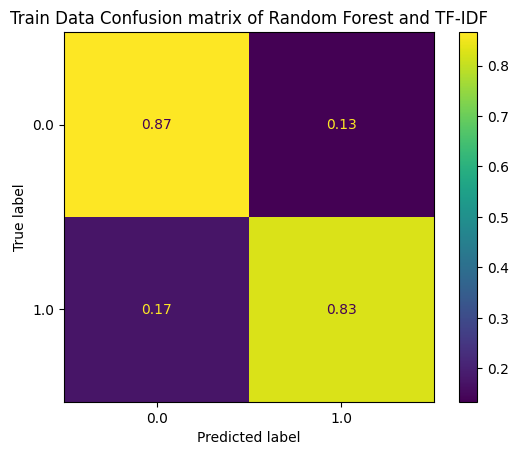

In [130]:
cm = confusion_matrix(y_train['oh_label'], train_predictions_w2v, labels=rf_word2vec.classes_, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_word2vec.classes_)
disp.plot()
plt.title("Train Data Confusion matrix of Random Forest and Word2Vec")
plt.show()

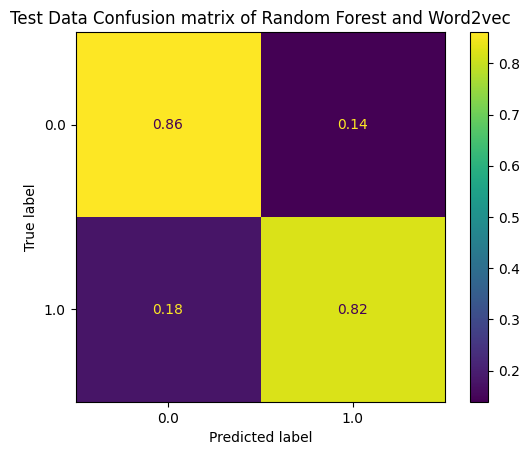

In [131]:
cm = confusion_matrix(y_test['oh_label'], test_predictions_w2v, labels=rf_word2vec.classes_, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_word2vec.classes_)
disp.plot()
plt.title("Test Data Confusion matrix of Random Forest and Word2vec")
plt.show()

### Compare with TF-IDF Vectorizer

In [132]:
# Train and test set
X_train, X_test, y_train, y_test = train_test_split(twitter_df[['tokenized']], twitter_df['oh_label'], stratify=twitter_df['oh_label'], random_state=42)
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.to_frame()
y_train = y_train.reset_index()
y_test = y_test.to_frame()
y_test = y_test.reset_index()

In [133]:
X_train['tokenized']

0         hi wifione thanks much patiently addressing co...
1         seriously believe episode air cancelled show p...
2         good point expect see article deleted bother c...
3         read background page user wikipedia making ent...
4         fair use rationale image ober headjpg thanks u...
                                ...                        
183083    category thanks fixing category article made n...
183084    squad number like said couple hour ago squad n...
183085                          oh lower case already fixed
183086       age stretch article run room neds page stretch
183087    since participated discussion pizzled hy would...
Name: tokenized, Length: 183088, dtype: object

In [134]:
tfidf_vect = TfidfVectorizer(analyzer='word',max_df=0.9,min_df=0.1,max_features=500)
tfidf_vect_fit=tfidf_vect.fit(X_train['tokenized'])


In [135]:
def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)



In [136]:
X_train = vectorize(X_train['tokenized'],tfidf_vect_fit)
X_train.head()

,article,like,one,page,please,see,wikipedia,would
0,0.342569,0.0,0.000000,0.000000,0.000000,0.440102,0.000000,0.830034
1,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,0.430424,0.0,0.000000,0.000000,0.000000,0.552971,0.486873,0.521453
3,0.000000,0.0,0.000000,0.424906,0.000000,0.000000,0.905238,0.000000
4,0.000000,0.0,0.163629,0.874996,0.333286,0.000000,0.310689,0.000000


In [137]:
# Save for later
y_train.to_csv("data/y_train_tfidf.csv")
X_train.to_csv("data/X_train_tfidf.csv")

In [138]:
# Load from the filename
X_train = pd.read_csv('data/X_train_tfidf.csv')
y_train = pd.read_csv('data/y_train_tfidf.csv')

In [139]:
start_time = time.time()

rf = RandomForestClassifier(
         n_jobs=-1,
         oob_score=True,
         random_state = 0)

params = dict(n_estimators=randint(10,200),
                     max_depth=randint(1,6),
                     min_samples_split=randint(1,30),
                     min_samples_leaf=randint(1,30),
                     class_weight=['balanced', 'balanced_subsample',None])
rf_tfidf = RandomizedSearchCV(rf, params, random_state=0, scoring='f1',n_iter=10, verbose=1, return_train_score=True)
rf_tfidf.fit(X_train, y_train['oh_label']) # refit with the best parameters
print(rf_tfidf.best_params_)
print("Time taken to train random forest: " + str(time.time() - start_time))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 185}
Time taken to train random forest: 88.28031063079834


In [143]:
train_predictions_tfidf = rf_tfidf.predict(X_train)
print(classification_report(y_train['oh_label'],train_predictions_tfidf))

              precision    recall  f1-score   support

         0.0       0.91      0.44      0.59    146309
         1.0       0.27      0.82      0.40     36779

    accuracy                           0.52    183088
   macro avg       0.59      0.63      0.50    183088
weighted avg       0.78      0.52      0.55    183088



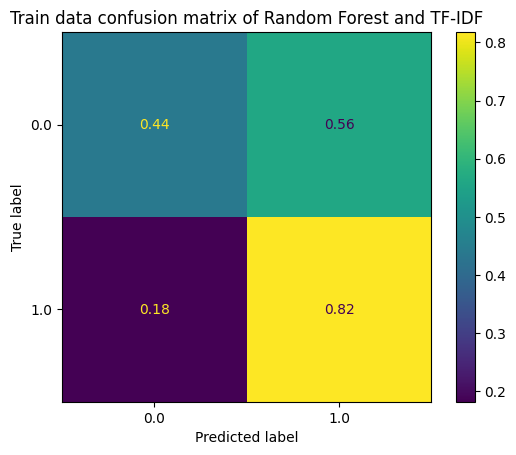

In [144]:
cm = confusion_matrix(y_train['oh_label'], train_predictions_tfidf, labels=rf_tfidf.classes_, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_tfidf.classes_)
disp.plot()
plt.title("Train data confusion matrix of Random Forest and TF-IDF")
plt.show()